In [14]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Load the data
data = pd.read_csv("Finale.csv")  # Replace with the actual path if different

# Drop unnecessary columns
data = data.drop(columns=[ "Unnamed: 0"])

# Inspect the first few rows to confirm changes
data.head()

,File,AdverseReaction,Severity
0,ADCETRIS,Peripheral Neuropathy,Severe
1,ADCETRIS,Anaphylaxis,Severe
2,ADCETRIS,Infusion Reactions,Severe
3,ADCETRIS,Hematologic Toxicities,Severe
4,ADCETRIS,Infections,Severe


In [26]:
import pandas as pd                          # For data manipulation
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.feature_extraction.text import TfidfVectorizer  # For text feature extraction
from sklearn.linear_model import LogisticRegression  # For the logistic regression model
from sklearn.metrics import classification_report   # For model evaluation


In [22]:
data['Severity'].unique()

array(['Severe', 'Mild', 'Moderate', 'Uncertain'], dtype=object)

In [19]:
# Merge classes
data['Severity'] = data['Severity'].replace({
    'None': 'Mild',
    'significantly': 'Moderate',
    'Life-threatening': 'Severe',
    'Risk':'Severe',
    'Grade':'Severe',
    'Very Mild': 'Mild'
})

In [20]:
data = data.dropna(subset=['Severity'])

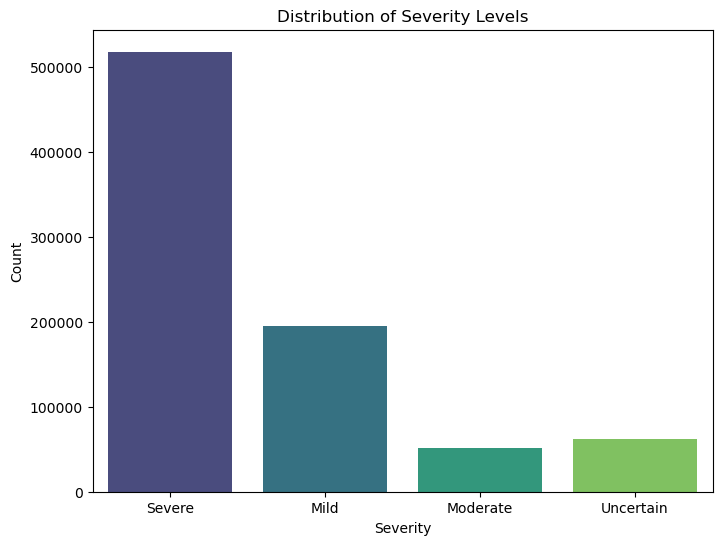

In [21]:
# Plot the distribution of severity levels
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Severity', palette='viridis')
plt.title('Distribution of Severity Levels')
plt.xlabel('Severity')
plt.ylabel('Count')

# Display the plot
plt.show()

In [24]:
# Define features and labels
X = data['AdverseReaction']
y = data['Severity'].map({
    'Uncertain': 0,  
    'Mild': 1, 
    'Moderate': 2, 
    'Severe': 3
})  # Define features and labels


In [29]:
# Feature extraction
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)
target_names = ['Uncertain', 'Mild', 'Moderate', 'Severe']


# Logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, labels=[0, 1, 2, 3], target_names=target_names))

              precision    recall  f1-score   support

   Uncertain       0.69      0.28      0.39     12584
        Mild       0.63      0.30      0.41     38848
    Moderate       0.64      0.25      0.36     10168
      Severe       0.71      0.94      0.81    103372

    accuracy                           0.70    164972
   macro avg       0.67      0.44      0.49    164972
weighted avg       0.68      0.70      0.65    164972

